In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import sys
import coffea.util as util
import time
import json
import os
import copy
from hist import Hist
sys.path.append("../../analysisTools/")
import plotTools as ptools
import mplhep as hep
hep.style.use("CMS")
plt.rcParams['font.size'] = 14.0
from matplotlib.colors import Normalize, LogNorm

In [2]:
class histLoader:
    def __init__(self,path):
        self.path = path
        self.names = []
        for f in os.listdir(path):
            if '.coffea' in f:
                self.names.append(f.split(".")[0])
    def load(self,hname):
        return util.load(f"{self.path}/{hname}.coffea")

class histContainer:
    def __init__(self,path):
        self.histos, self.metadata = util.load(path)
    def load(self,hname):
        return self.histos[hname]
    
def hplot(h,overlay):
    axes = h.axes
    targ = None
    for a in axes:
        if a.name == overlay:
            targ = a
    if targ is None:
        print("can't find overlay axis!")
        return

In [7]:
histos = histLoader("../../outputs/sig/signal_v5_xcleanStudy_2018_aEM_histos_old/")

# Summary Efficiency Plots

In [8]:
outD = "plots_withXcleanInfo/recoEfficiency/"
os.makedirs(outD,exist_ok=True)

## Efficiency by $p_T$

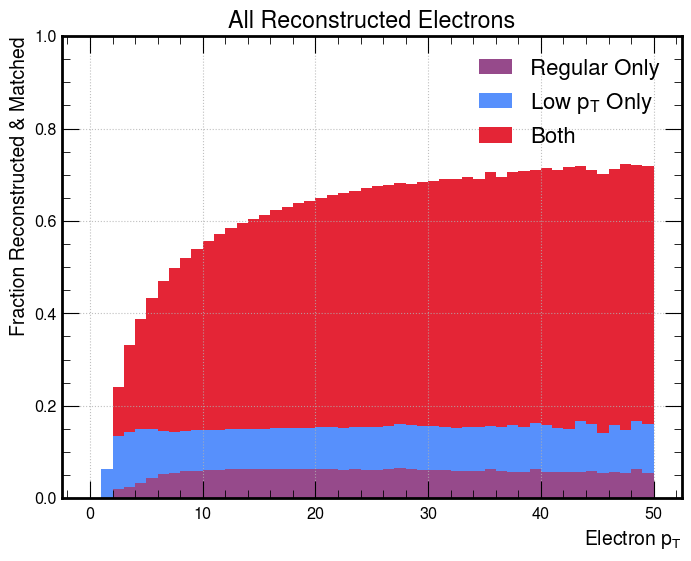

In [9]:
pt_cut = complex('50j')

hm = histos.load("match_ele_gen_pt")[{"cut":"no_presel","samp":sum,'passID':sum}][:,:pt_cut]
hg = histos.load("gen_ele_pt")[{"cut":'no_presel','samp':sum}][:pt_cut]
mtypes = ['R',"Both","L"]

num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")
plt.bar(centers,fracs['Both'],width,bottom=fracs['R']+fracs['L'],label=r"Both",color="C2")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(f"Electron $p_T$")
plt.title("All Reconstructed Electrons")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.savefig(f"{outD}/summary/allSamples_recoEff_by_pt.pdf")

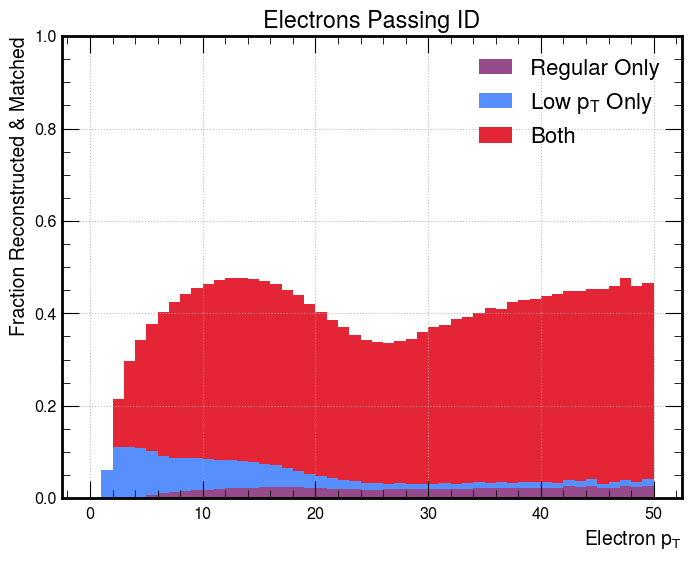

In [22]:
pt_cut = complex('50j')

hm = histos.load("match_ele_gen_pt")[{"cut":"no_presel","samp":sum,'passID':1}][:,:pt_cut]
hg = histos.load("gen_ele_pt")[{"cut":'no_presel','samp':sum}][:pt_cut]
mtypes = ['R',"Both","L"]

num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")
plt.bar(centers,fracs['Both'],width,bottom=fracs['R']+fracs['L'],label=r"Both",color="C2")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(f"Electron $p_T$")
plt.title("Electrons Passing ID")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()

plt.savefig(f"{outD}/summary/allSamples_recoEff_by_pt_passID.pdf")

## Efficiency by $L_{xy}$

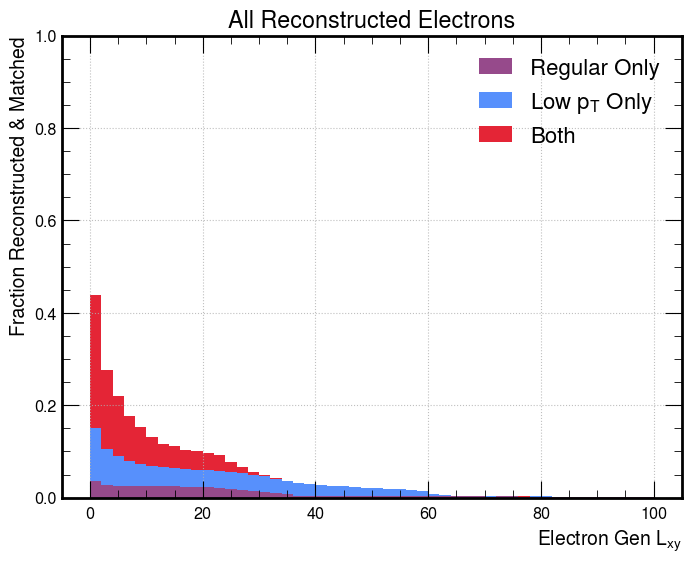

In [7]:
hm = histos.load("match_ele_gen_vxy100")[{"cut":"no_presel","samp":sum,'passID':sum}][:,::2j]
hg = histos.load("gen_ele_vxy100")[{"cut":'no_presel','samp':sum}][::2j]
mtypes = ['R',"Both","L"]

num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")
plt.bar(centers,fracs['Both'],width,bottom=fracs['R']+fracs['L'],label=r"Both",color="C2")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $L_{xy}$")
plt.title("All Reconstructed Electrons")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()

plt.savefig(f"{outD}/summary/allSamples_recoEff_by_lxy.pdf")

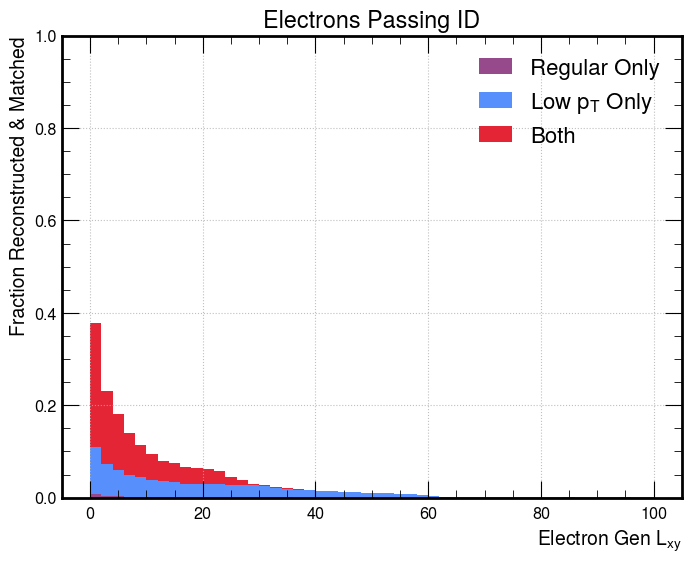

In [8]:
hm = histos.load("match_ele_gen_vxy100")[{"cut":"no_presel","samp":sum,'passID':1}][:,::2j]
hg = histos.load("gen_ele_vxy100")[{"cut":'no_presel','samp':sum}][::2j]
mtypes = ['R',"Both","L"]

num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")
plt.bar(centers,fracs['Both'],width,bottom=fracs['R']+fracs['L'],label=r"Both",color="C2")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $L_{xy}$")
plt.title("Electrons Passing ID")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()

plt.savefig(f"{outD}/summary/allSamples_recoEff_by_lxy_passID.pdf")

## $p_T$ effs in Lxy bins

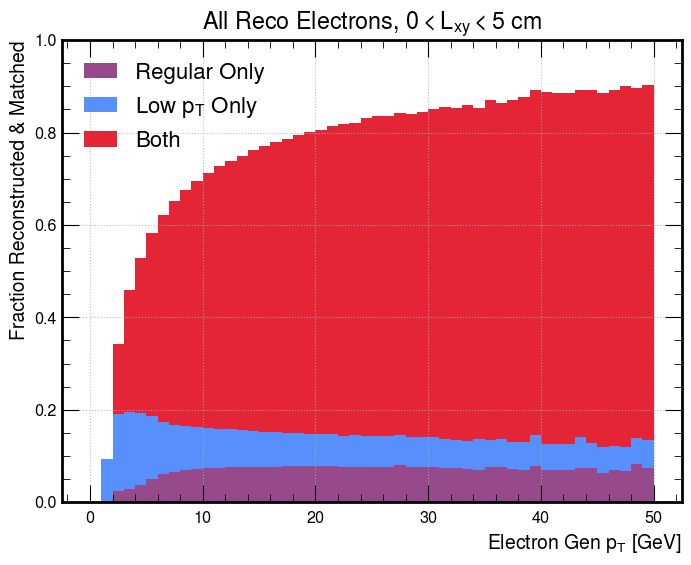

In [9]:
hm = histos.load("match_ele_gen_pt_vs_vxy100")[{"cut":"no_presel","samp":sum,'passID':sum}]
hg = histos.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]

ptlo = 0j
pthi = 50j
lxylo = 0j
lxyhi = 5j

hm = hm[:,ptlo:pthi,lxylo:lxyhi:sum]
hg = hg[ptlo:pthi,lxylo:lxyhi:sum]

mtypes = ['R',"Both","L"]
num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")
plt.bar(centers,fracs['Both'],width,bottom=fracs['R']+fracs['L'],label=r"Both",color="C2")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $p_T$ [GeV]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"All Reco Electrons, ${lxylo.imag:.0f} < L_{{xy}} < {lxyhi.imag:.0f}$ cm")

plt.savefig(f"{outD}/summary/allSamples_recoEff_by_pt_lxy0to5.pdf")

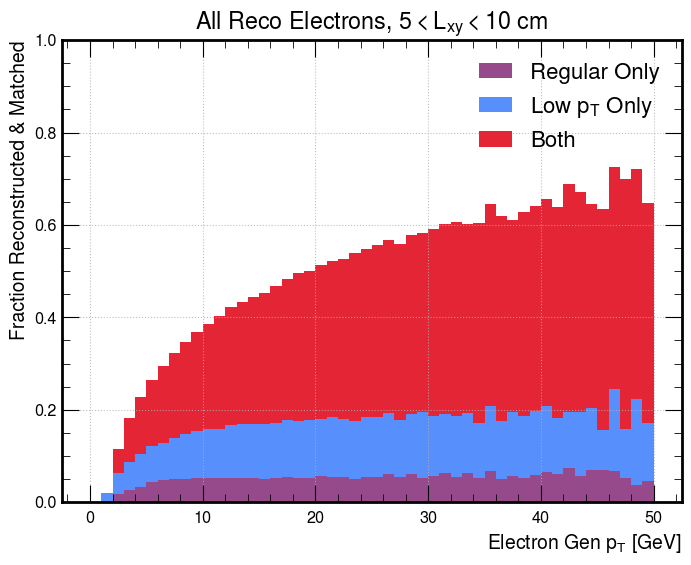

In [10]:
hm = histos.load("match_ele_gen_pt_vs_vxy100")[{"cut":"no_presel","samp":sum,'passID':sum}]
hg = histos.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]

ptlo = 0j
pthi = 50j
lxylo = 5j
lxyhi = 10j

hm = hm[:,ptlo:pthi,lxylo:lxyhi:sum]
hg = hg[ptlo:pthi,lxylo:lxyhi:sum]

mtypes = ['R',"Both","L"]
num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")
plt.bar(centers,fracs['Both'],width,bottom=fracs['R']+fracs['L'],label=r"Both",color="C2")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $p_T$ [GeV]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"All Reco Electrons, ${lxylo.imag:.0f} < L_{{xy}} < {lxyhi.imag:.0f}$ cm")

plt.savefig(f"{outD}/summary/allSamples_recoEff_by_pt_lxy5to10.pdf")

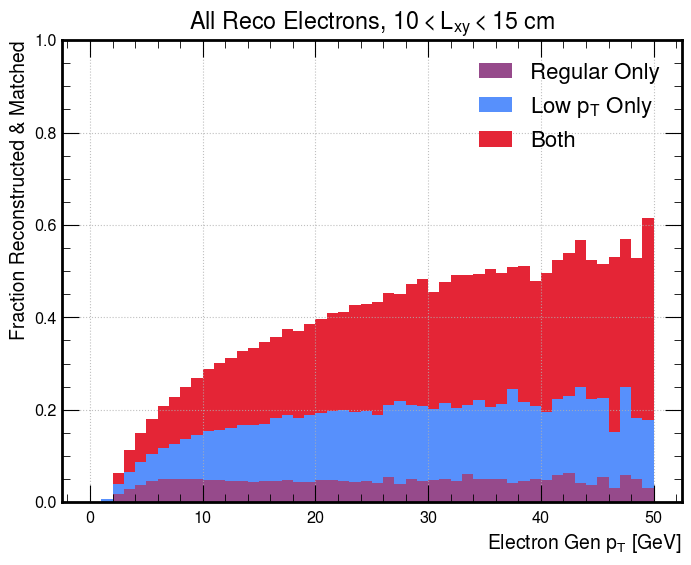

In [13]:
hm = histos.load("match_ele_gen_pt_vs_vxy100")[{"cut":"no_presel","samp":sum,'passID':sum}]
hg = histos.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]

ptlo = 0j
pthi = 50j
lxylo = 10j
lxyhi = 15j

hm = hm[:,ptlo:pthi,lxylo:lxyhi:sum]
hg = hg[ptlo:pthi,lxylo:lxyhi:sum]

mtypes = ['R',"Both","L"]
num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")
plt.bar(centers,fracs['Both'],width,bottom=fracs['R']+fracs['L'],label=r"Both",color="C2")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $p_T$ [GeV]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"All Reco Electrons, ${lxylo.imag:.0f} < L_{{xy}} < {lxyhi.imag:.0f}$ cm")

plt.savefig(f"{outD}/summary/allSamples_recoEff_by_pt_lxy10to15.pdf")

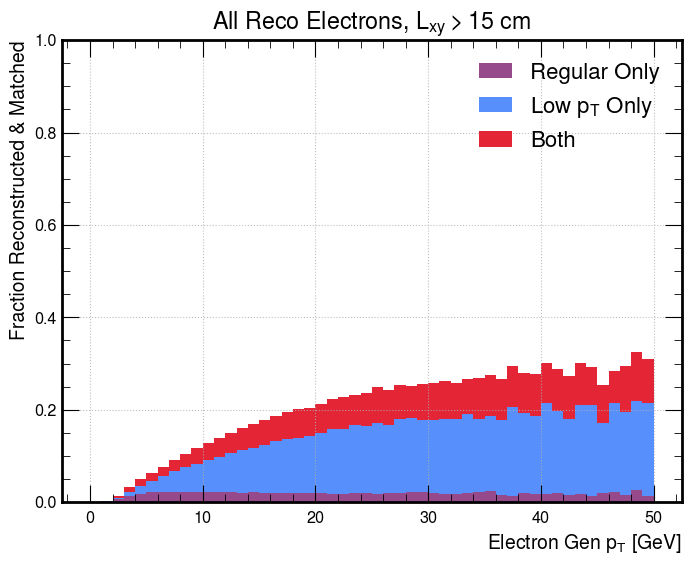

In [14]:
hm = histos.load("match_ele_gen_pt_vs_vxy100")[{"cut":"no_presel","samp":sum,'passID':sum}]
hg = histos.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]

ptlo = 0j
pthi = 50j
lxylo = 15j

hm = hm[:,ptlo:pthi,lxylo::sum]
hg = hg[ptlo:pthi,lxylo::sum]

mtypes = ['R',"Both","L"]
num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")
plt.bar(centers,fracs['Both'],width,bottom=fracs['R']+fracs['L'],label=r"Both",color="C2")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $p_T$ [GeV]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"All Reco Electrons, $L_{{xy}} > {lxylo.imag:.0f}$ cm")

plt.savefig(f"{outD}/summary/allSamples_recoEff_by_pt_lxy15toInf.pdf")

## $L_{xy}$ Effs in $p_T$ bins

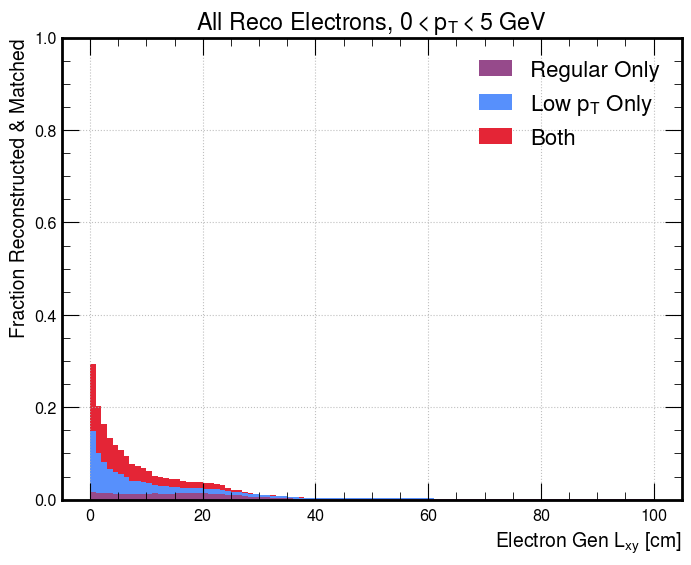

In [15]:
hm = histos.load("match_ele_gen_pt_vs_vxy100")[{"cut":"no_presel","samp":sum,'passID':sum}]
hg = histos.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]

ptlo = 0j
pthi = 5j
lxylo = 0j
lxyhi = 100j

hm = hm[:,ptlo:pthi:sum,lxylo:lxyhi]
hg = hg[ptlo:pthi:sum,lxylo:lxyhi]

mtypes = ['R',"Both","L"]
num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")
plt.bar(centers,fracs['Both'],width,bottom=fracs['R']+fracs['L'],label=r"Both",color="C2")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $L_{xy}$ [cm]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"All Reco Electrons, ${ptlo.imag:.0f} < p_T < {pthi.imag:.0f}$ GeV")

plt.savefig(f"{outD}/summary/allSamples_recoEff_by_lxy_pt0to5.pdf")

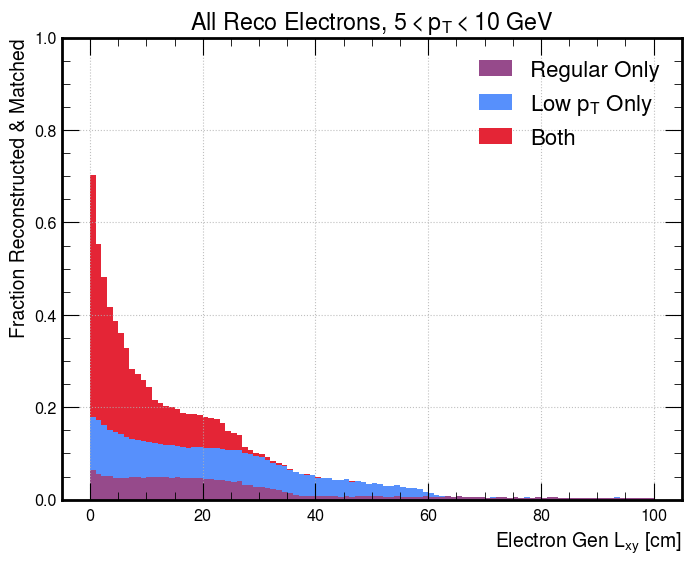

In [16]:
hm = histos.load("match_ele_gen_pt_vs_vxy100")[{"cut":"no_presel","samp":sum,'passID':sum}]
hg = histos.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]

ptlo = 5j
pthi = 10j
lxylo = 0j
lxyhi = 100j

hm = hm[:,ptlo:pthi:sum,lxylo:lxyhi]
hg = hg[ptlo:pthi:sum,lxylo:lxyhi]

mtypes = ['R',"Both","L"]
num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")
plt.bar(centers,fracs['Both'],width,bottom=fracs['R']+fracs['L'],label=r"Both",color="C2")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $L_{xy}$ [cm]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"All Reco Electrons, ${ptlo.imag:.0f} < p_T < {pthi.imag:.0f}$ GeV")

plt.savefig(f"{outD}/summary/allSamples_recoEff_by_lxy_pt5to10.pdf")

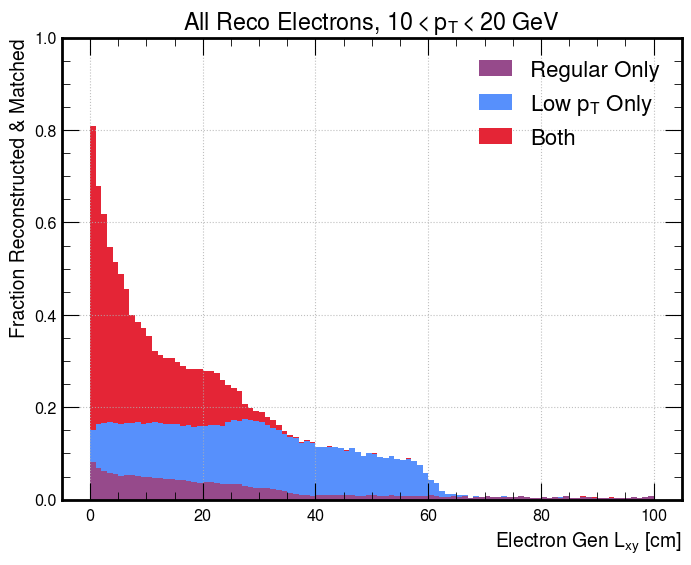

In [17]:
hm = histos.load("match_ele_gen_pt_vs_vxy100")[{"cut":"no_presel","samp":sum,'passID':sum}]
hg = histos.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]

ptlo = 10j
pthi = 20j
lxylo = 0j
lxyhi = 100j

hm = hm[:,ptlo:pthi:sum,lxylo:lxyhi]
hg = hg[ptlo:pthi:sum,lxylo:lxyhi]

mtypes = ['R',"Both","L"]
num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")
plt.bar(centers,fracs['Both'],width,bottom=fracs['R']+fracs['L'],label=r"Both",color="C2")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $L_{xy}$ [cm]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"All Reco Electrons, ${ptlo.imag:.0f} < p_T < {pthi.imag:.0f}$ GeV")

plt.savefig(f"{outD}/summary/allSamples_recoEff_by_lxy_pt10to20.pdf")

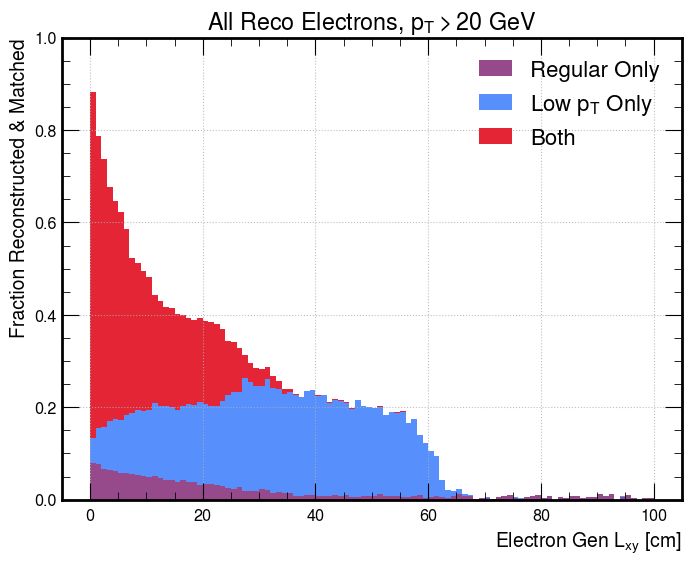

In [18]:
hm = histos.load("match_ele_gen_pt_vs_vxy100")[{"cut":"no_presel","samp":sum,'passID':sum}]
hg = histos.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]

ptlo = 20j
lxylo = 0j
lxyhi = 100j

hm = hm[:,ptlo::sum,lxylo:lxyhi]
hg = hg[ptlo::sum,lxylo:lxyhi]

mtypes = ['R',"Both","L"]
num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")
plt.bar(centers,fracs['Both'],width,bottom=fracs['R']+fracs['L'],label=r"Both",color="C2")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $L_{xy}$ [cm]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"All Reco Electrons, $p_T > {ptlo.imag:.0f}$ GeV")

plt.savefig(f"{outD}/summary/allSamples_recoEff_by_lxy_pt20toInf.pdf")

## $p_T$ effs in Lxy bins - pass ID

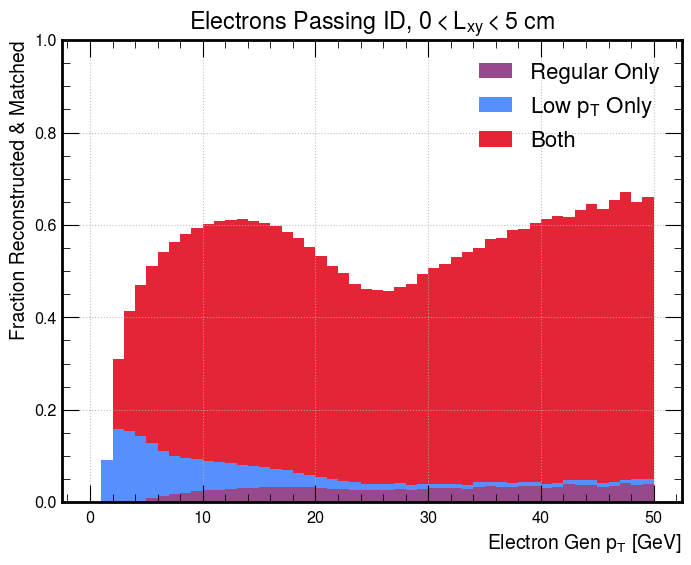

In [10]:
hm = histos.load("match_ele_gen_pt_vs_vxy100")[{"cut":"no_presel","samp":sum,'passID':1}]
hg = histos.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]

ptlo = 0j
pthi = 50j
lxylo = 0j
lxyhi = 5j

hm = hm[:,ptlo:pthi,lxylo:lxyhi:sum]
hg = hg[ptlo:pthi,lxylo:lxyhi:sum]

mtypes = ['R',"Both","L"]
num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")
plt.bar(centers,fracs['Both'],width,bottom=fracs['R']+fracs['L'],label=r"Both",color="C2")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $p_T$ [GeV]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"Electrons Passing ID, ${lxylo.imag:.0f} < L_{{xy}} < {lxyhi.imag:.0f}$ cm")

plt.savefig(f"{outD}/summary/allSamples_recoEff_by_pt_lxy0to5_passID.pdf")

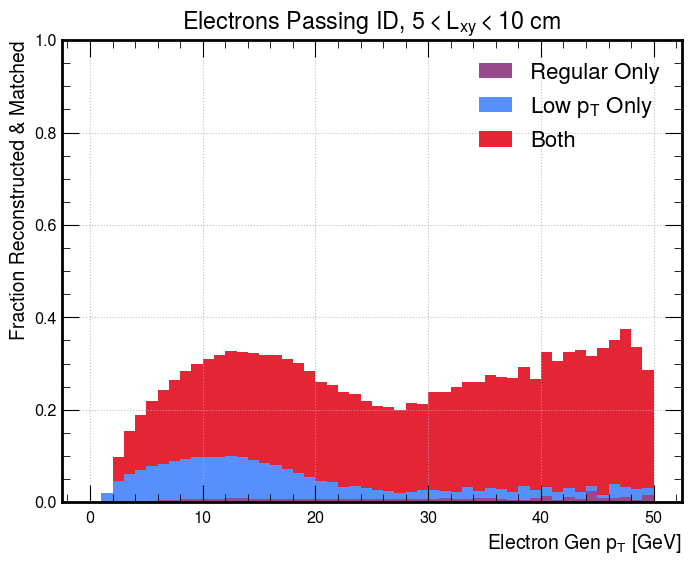

In [11]:
hm = histos.load("match_ele_gen_pt_vs_vxy100")[{"cut":"no_presel","samp":sum,'passID':1}]
hg = histos.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]

ptlo = 0j
pthi = 50j
lxylo = 5j
lxyhi = 10j

hm = hm[:,ptlo:pthi,lxylo:lxyhi:sum]
hg = hg[ptlo:pthi,lxylo:lxyhi:sum]

mtypes = ['R',"Both","L"]
num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")
plt.bar(centers,fracs['Both'],width,bottom=fracs['R']+fracs['L'],label=r"Both",color="C2")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $p_T$ [GeV]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"Electrons Passing ID, ${lxylo.imag:.0f} < L_{{xy}} < {lxyhi.imag:.0f}$ cm")

plt.savefig(f"{outD}/summary/allSamples_recoEff_by_pt_lxy5to10_passID.pdf")

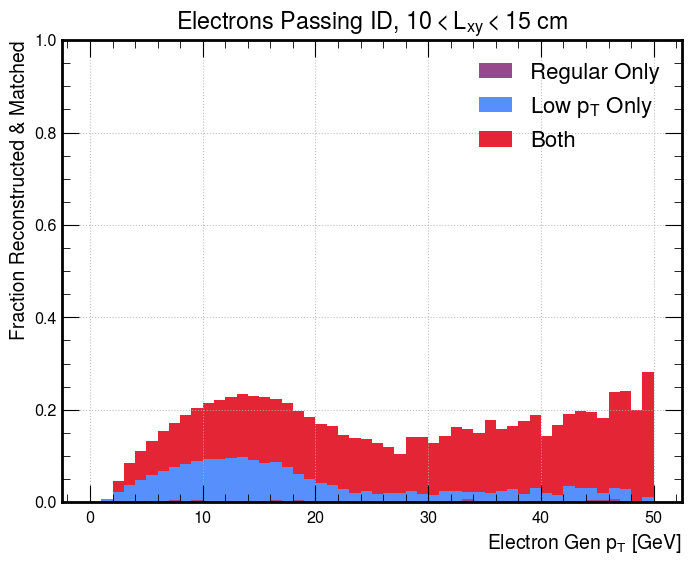

In [12]:
hm = histos.load("match_ele_gen_pt_vs_vxy100")[{"cut":"no_presel","samp":sum,'passID':1}]
hg = histos.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]

ptlo = 0j
pthi = 50j
lxylo = 10j
lxyhi = 15j

hm = hm[:,ptlo:pthi,lxylo:lxyhi:sum]
hg = hg[ptlo:pthi,lxylo:lxyhi:sum]

mtypes = ['R',"Both","L"]
num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")
plt.bar(centers,fracs['Both'],width,bottom=fracs['R']+fracs['L'],label=r"Both",color="C2")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $p_T$ [GeV]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"Electrons Passing ID, ${lxylo.imag:.0f} < L_{{xy}} < {lxyhi.imag:.0f}$ cm")

plt.savefig(f"{outD}/summary/allSamples_recoEff_by_pt_lxy10to15_passID.pdf")

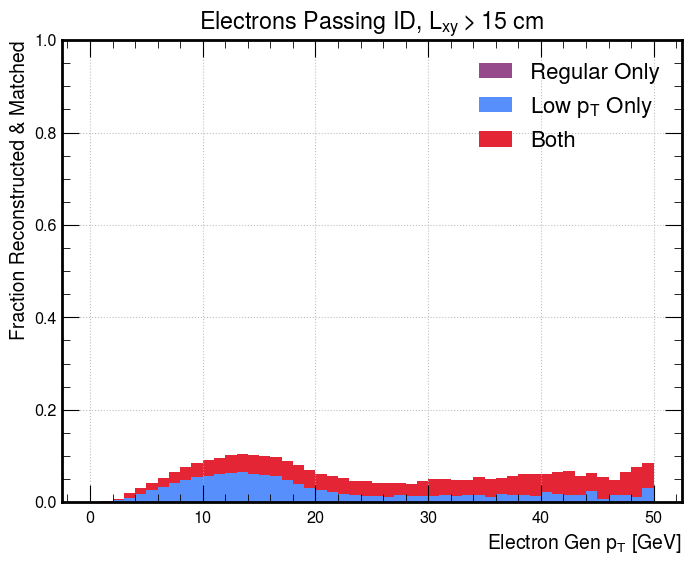

In [13]:
hm = histos.load("match_ele_gen_pt_vs_vxy100")[{"cut":"no_presel","samp":sum,'passID':1}]
hg = histos.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]

ptlo = 0j
pthi = 50j
lxylo = 15j

hm = hm[:,ptlo:pthi,lxylo::sum]
hg = hg[ptlo:pthi,lxylo::sum]

mtypes = ['R',"Both","L"]
num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")
plt.bar(centers,fracs['Both'],width,bottom=fracs['R']+fracs['L'],label=r"Both",color="C2")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $p_T$ [GeV]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"Electrons Passing ID, $L_{{xy}} > {lxylo.imag:.0f}$ cm")

plt.savefig(f"{outD}/summary/allSamples_recoEff_by_pt_lxy15toInf_passID.pdf")

## $L_{xy}$ Effs in $p_T$ bins - passID

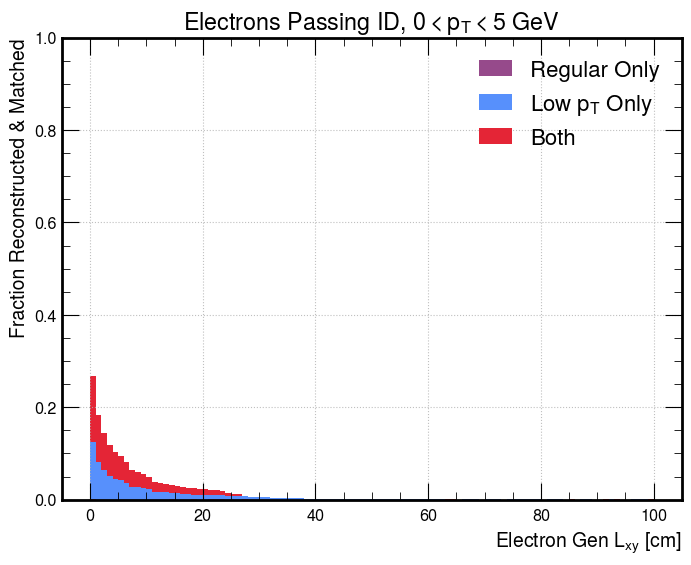

In [14]:
hm = histos.load("match_ele_gen_pt_vs_vxy100")[{"cut":"no_presel","samp":sum,'passID':1}]
hg = histos.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]

ptlo = 0j
pthi = 5j
lxylo = 0j
lxyhi = 100j

hm = hm[:,ptlo:pthi:sum,lxylo:lxyhi]
hg = hg[ptlo:pthi:sum,lxylo:lxyhi]

mtypes = ['R',"Both","L"]
num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")
plt.bar(centers,fracs['Both'],width,bottom=fracs['R']+fracs['L'],label=r"Both",color="C2")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $L_{xy}$ [cm]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"Electrons Passing ID, ${ptlo.imag:.0f} < p_T < {pthi.imag:.0f}$ GeV")

plt.savefig(f"{outD}/summary/allSamples_recoEff_by_lxy_pt0to5_passID.pdf")

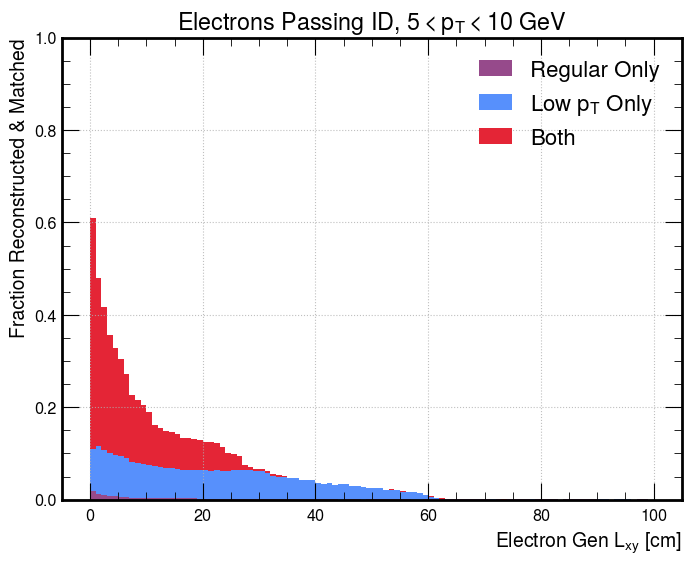

In [15]:
hm = histos.load("match_ele_gen_pt_vs_vxy100")[{"cut":"no_presel","samp":sum,'passID':1}]
hg = histos.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]

ptlo = 5j
pthi = 10j
lxylo = 0j
lxyhi = 100j

hm = hm[:,ptlo:pthi:sum,lxylo:lxyhi]
hg = hg[ptlo:pthi:sum,lxylo:lxyhi]

mtypes = ['R',"Both","L"]
num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")
plt.bar(centers,fracs['Both'],width,bottom=fracs['R']+fracs['L'],label=r"Both",color="C2")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $L_{xy}$ [cm]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"Electrons Passing ID, ${ptlo.imag:.0f} < p_T < {pthi.imag:.0f}$ GeV")

plt.savefig(f"{outD}/summary/allSamples_recoEff_by_lxy_pt5to10_passID.pdf")

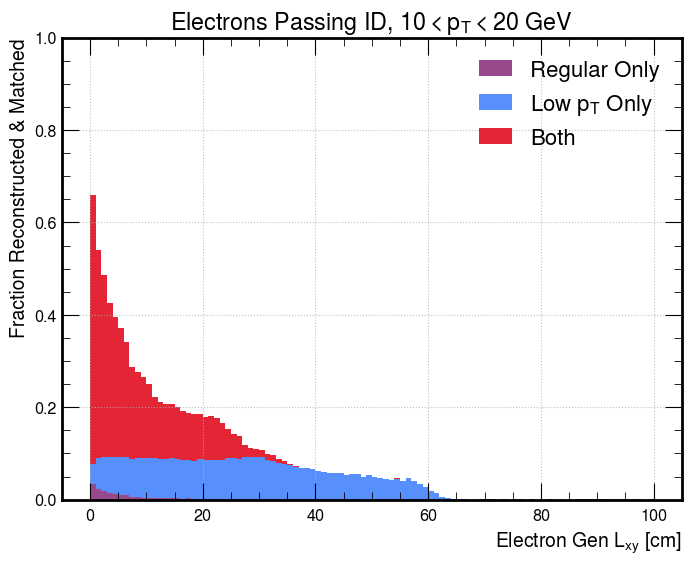

In [16]:
hm = histos.load("match_ele_gen_pt_vs_vxy100")[{"cut":"no_presel","samp":sum,'passID':1}]
hg = histos.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]

ptlo = 10j
pthi = 20j
lxylo = 0j
lxyhi = 100j

hm = hm[:,ptlo:pthi:sum,lxylo:lxyhi]
hg = hg[ptlo:pthi:sum,lxylo:lxyhi]

mtypes = ['R',"Both","L"]
num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")
plt.bar(centers,fracs['Both'],width,bottom=fracs['R']+fracs['L'],label=r"Both",color="C2")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $L_{xy}$ [cm]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"Electrons Passing ID, ${ptlo.imag:.0f} < p_T < {pthi.imag:.0f}$ GeV")

plt.savefig(f"{outD}/summary/allSamples_recoEff_by_lxy_pt10to20_passID.pdf")

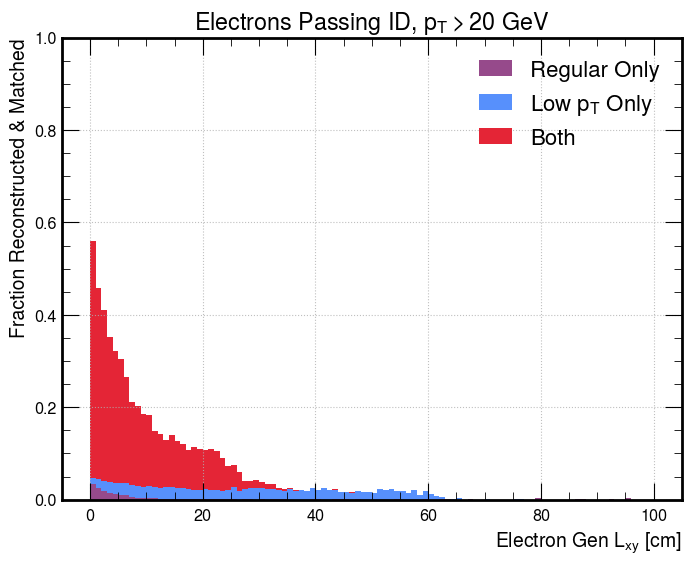

In [17]:
hm = histos.load("match_ele_gen_pt_vs_vxy100")[{"cut":"no_presel","samp":sum,'passID':1}]
hg = histos.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]

ptlo = 20j
lxylo = 0j
lxyhi = 100j

hm = hm[:,ptlo::sum,lxylo:lxyhi]
hg = hg[ptlo::sum,lxylo:lxyhi]

mtypes = ['R',"Both","L"]
num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")
plt.bar(centers,fracs['Both'],width,bottom=fracs['R']+fracs['L'],label=r"Both",color="C2")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $L_{xy}$ [cm]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"Electrons Passing ID, $p_T > {ptlo.imag:.0f}$ GeV")

plt.savefig(f"{outD}/summary/allSamples_recoEff_by_lxy_pt20toInf_passID.pdf")

## $p_T$ eff in $\Delta R$ bins

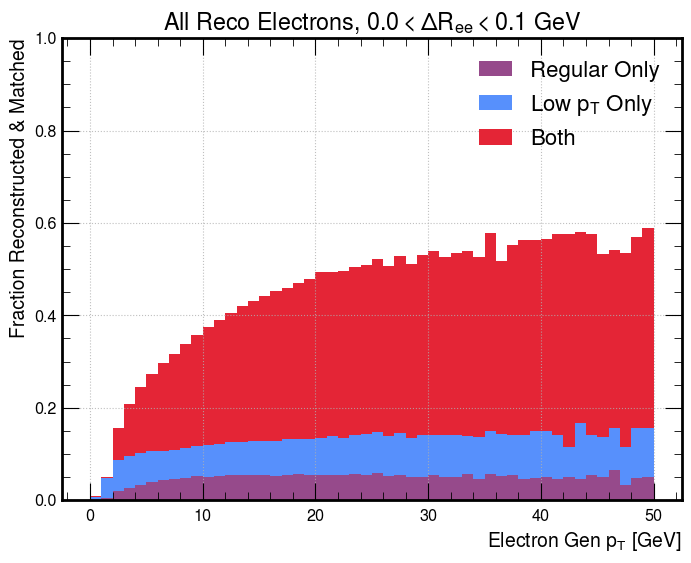

In [29]:
hm = histos.load("match_ele_gen_pt_vs_dR")[{"cut":"no_presel","samp":sum,'passID':sum}]
hg = histos.load("gen_ele_pt_vs_dR")[{"cut":'no_presel','samp':sum}]

ptlo = 0j
pthi = 50j
drlo = 0j
drhi = 0.1j

hm = hm[:,ptlo:pthi,drlo:drhi:sum]
hg = hg[ptlo:pthi,drlo:drhi:sum]

mtypes = ['R',"Both","L"]
num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")
plt.bar(centers,fracs['Both'],width,bottom=fracs['R']+fracs['L'],label=r"Both",color="C2")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $p_T$ [GeV]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"All Reco Electrons, ${drlo.imag:.1f} < \Delta R_{{ee}} < {drhi.imag:.1f}$ GeV")

plt.savefig(f"{outD}/summary/allSamples_recoEff_by_pt_dR0to0.1.pdf")

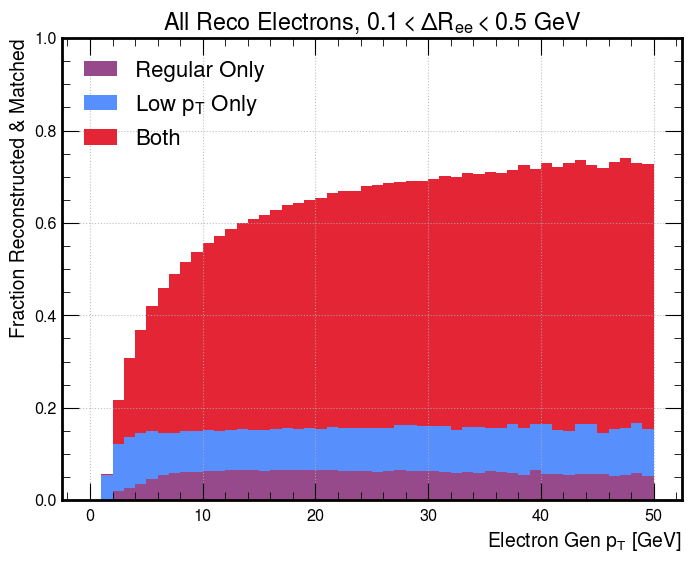

In [30]:
hm = histos.load("match_ele_gen_pt_vs_dR")[{"cut":"no_presel","samp":sum,'passID':sum}]
hg = histos.load("gen_ele_pt_vs_dR")[{"cut":'no_presel','samp':sum}]

ptlo = 0j
pthi = 50j
drlo = 0.1j
drhi = 0.5j

hm = hm[:,ptlo:pthi,drlo:drhi:sum]
hg = hg[ptlo:pthi,drlo:drhi:sum]

mtypes = ['R',"Both","L"]
num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")
plt.bar(centers,fracs['Both'],width,bottom=fracs['R']+fracs['L'],label=r"Both",color="C2")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $p_T$ [GeV]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"All Reco Electrons, ${drlo.imag:.1f} < \Delta R_{{ee}} < {drhi.imag:.1f}$ GeV")

plt.savefig(f"{outD}/summary/allSamples_recoEff_by_pt_dR0.1to0.5.pdf")

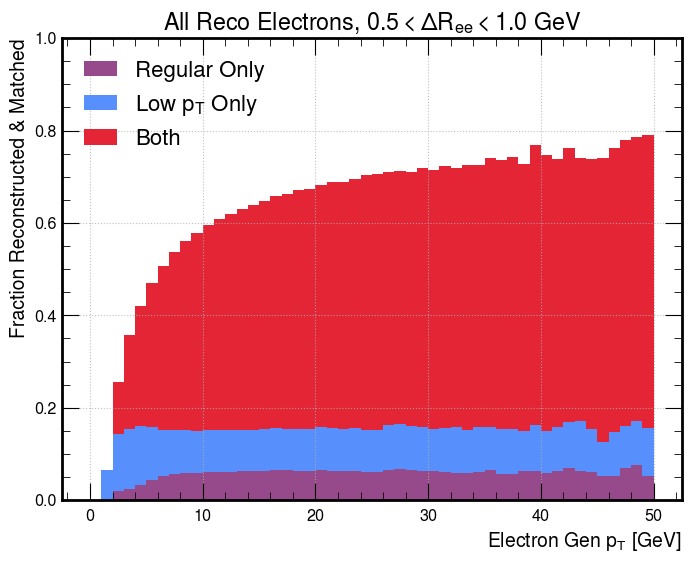

In [31]:
hm = histos.load("match_ele_gen_pt_vs_dR")[{"cut":"no_presel","samp":sum,'passID':sum}]
hg = histos.load("gen_ele_pt_vs_dR")[{"cut":'no_presel','samp':sum}]

ptlo = 0j
pthi = 50j
drlo = 0.5j
drhi = 1.0j

hm = hm[:,ptlo:pthi,drlo:drhi:sum]
hg = hg[ptlo:pthi,drlo:drhi:sum]

mtypes = ['R',"Both","L"]
num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")
plt.bar(centers,fracs['Both'],width,bottom=fracs['R']+fracs['L'],label=r"Both",color="C2")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $p_T$ [GeV]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"All Reco Electrons, ${drlo.imag:.1f} < \Delta R_{{ee}} < {drhi.imag:.1f}$ GeV")

plt.savefig(f"{outD}/summary/allSamples_recoEff_by_pt_dR0.5to1.0.pdf")

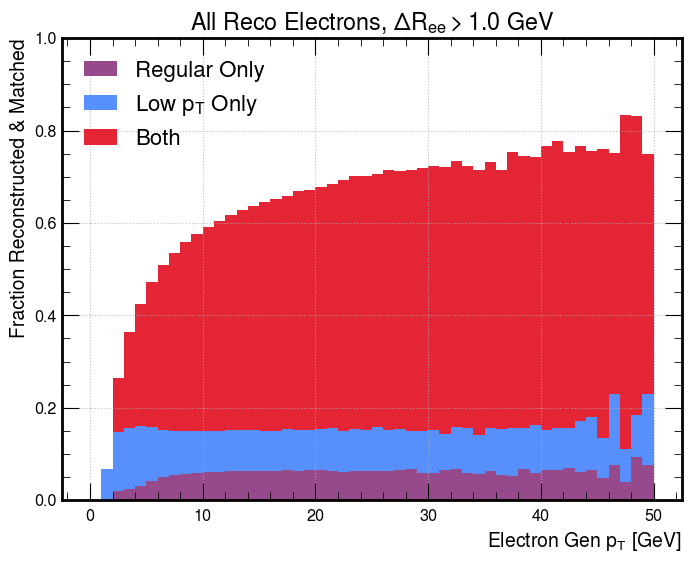

In [32]:
hm = histos.load("match_ele_gen_pt_vs_dR")[{"cut":"no_presel","samp":sum,'passID':sum}]
hg = histos.load("gen_ele_pt_vs_dR")[{"cut":'no_presel','samp':sum}]

ptlo = 0j
pthi = 50j
drlo = 1.0j

hm = hm[:,ptlo:pthi,drlo::sum]
hg = hg[ptlo:pthi,drlo::sum]

mtypes = ['R',"Both","L"]
num_gen = hg.values()
fracs = {t:hm[{"match_type":t}].values()/num_gen for t in mtypes}
centers = hg.axes[0].centers
width = hg.axes[0].widths[0]

plt.figure(figsize=(8,6))
plt.bar(centers,fracs['R'],width,label="Regular Only",color="C3")
plt.bar(centers,fracs['L'],width,bottom=fracs['R'],label="Low $p_T$ Only",color="C0")
plt.bar(centers,fracs['Both'],width,bottom=fracs['R']+fracs['L'],label=r"Both",color="C2")

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $p_T$ [GeV]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"All Reco Electrons, $\Delta R_{{ee}} > {drlo.imag:.1f}$ GeV")

plt.savefig(f"{outD}/summary/allSamples_recoEff_by_pt_dR1.0toInf.pdf")

## 2D $p_T$ vs $L_{xy}$

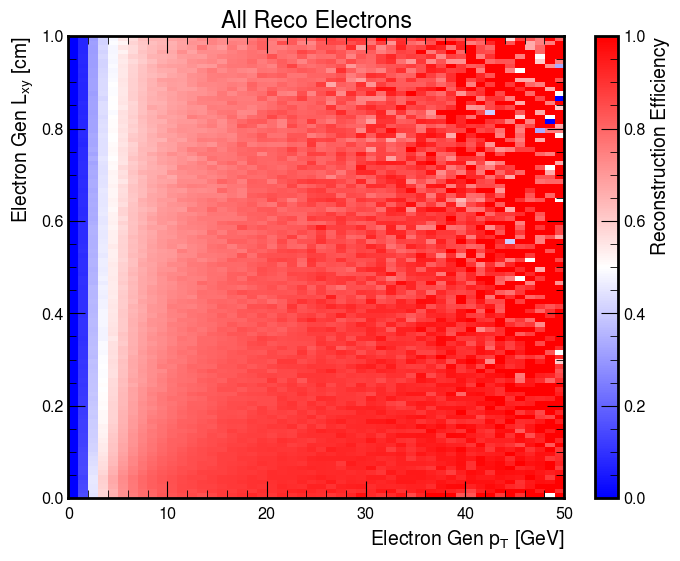

In [45]:
hm = histos.load("match_ele_gen_pt_vs_vxy1")[{"cut":"no_presel","samp":sum,'passID':sum,'match_type':sum}]
hg = histos.load("gen_ele_pt_vs_vxy1")[{"cut":'no_presel','samp':sum}]

num_gen = hg.values()
num_reco = hm.values()
eff = num_reco/num_gen
binsx,binsy = hg.axes[0].edges, hg.axes[1].edges
extent = [binsx[0],binsx[-1],binsy[0],binsy[-1]]

plt.figure(figsize=(8,6))
plt.imshow(eff.T,origin='lower',extent=extent,aspect='auto',cmap='bwr')

plt.ylabel(r"Electron Gen $L_{xy}$ [cm]")
plt.xlabel(r"Electron Gen $p_T$ [GeV]")
plt.title(rf"All Reco Electrons")
plt.colorbar(label='Reconstruction Efficiency')

plt.savefig(f"{outD}/summary/allSamples_recoEff_2d_pt_vs_vxy1.pdf")

/tmp/ipykernel_3234/3809230718.py:6: RuntimeWarning: invalid value encountered in divide
  eff = num_reco/num_gen


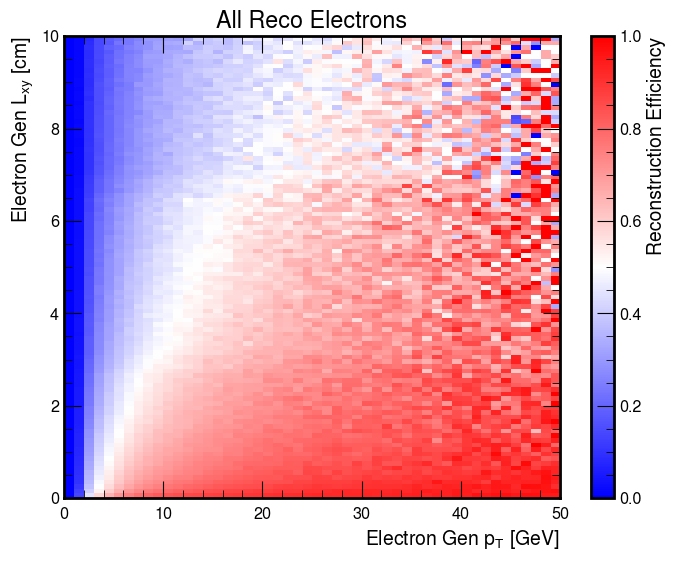

In [46]:
hm = histos.load("match_ele_gen_pt_vs_vxy10")[{"cut":"no_presel","samp":sum,'passID':sum,'match_type':sum}]
hg = histos.load("gen_ele_pt_vs_vxy10")[{"cut":'no_presel','samp':sum}]

num_gen = hg.values()
num_reco = hm.values()
eff = num_reco/num_gen
binsx,binsy = hg.axes[0].edges, hg.axes[1].edges
extent = [binsx[0],binsx[-1],binsy[0],binsy[-1]]

plt.figure(figsize=(8,6))
plt.imshow(eff.T,origin='lower',extent=extent,aspect='auto',cmap='bwr')

plt.ylabel(r"Electron Gen $L_{xy}$ [cm]")
plt.xlabel(r"Electron Gen $p_T$ [GeV]")
plt.title(rf"All Reco Electrons")
plt.colorbar(label='Reconstruction Efficiency')

plt.savefig(f"{outD}/summary/allSamples_recoEff_2d_pt_vs_vxy10.pdf")

/tmp/ipykernel_3234/2840879254.py:6: RuntimeWarning: invalid value encountered in divide
  eff = num_reco/num_gen


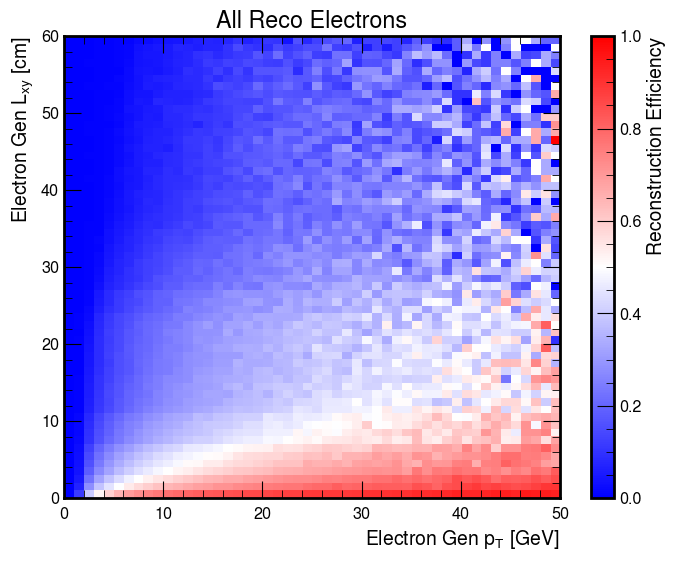

In [47]:
hm = histos.load("match_ele_gen_pt_vs_vxy100")[{"cut":"no_presel","samp":sum,'passID':sum,'match_type':sum}][:,:60j]
hg = histos.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}][:,:60j]

num_gen = hg.values()
num_reco = hm.values()
eff = num_reco/num_gen
binsx,binsy = hg.axes[0].edges, hg.axes[1].edges
extent = [binsx[0],binsx[-1],binsy[0],binsy[-1]]

plt.figure(figsize=(8,6))
plt.imshow(eff.T,origin='lower',extent=extent,aspect='auto',cmap='bwr')

plt.ylabel(r"Electron Gen $L_{xy}$ [cm]")
plt.xlabel(r"Electron Gen $p_T$ [GeV]")
plt.title(rf"All Reco Electrons")
plt.colorbar(label='Reconstruction Efficiency')

plt.savefig(f"{outD}/summary/allSamples_recoEff_2d_pt_vs_vxy100.pdf")

# Gen-matched electron variable plots

In [5]:
outD = "plots_withXcleanInfo/match_ele_kinematics/"
os.makedirs(outD,exist_ok=True)

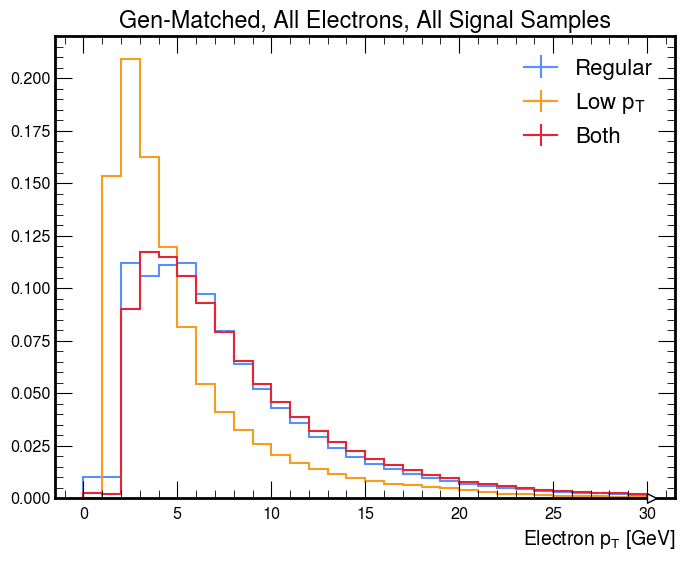

In [8]:
h = histos.load('match_ele_pt')[{"samp":sum,'cut':'no_presel','passID':sum}][:,:30j]
plt.figure(figsize=(8,6))
hs = [h[{"match_type":"R"}],h[{"match_type":"L"}],h[{"match_type":"Both"}]]
hep.histplot(hs,label=['Regular',r'Low $p_T$','Both'],ax=plt.gca(),stack=False,density=True)
plt.legend(fontsize=16)
plt.xlabel("Electron $p_T$ [GeV]")
plt.title("Gen-Matched, All Electrons, All Signal Samples")
plt.savefig(f"{outD}/match_ele_pt_withXcleanVars.pdf")

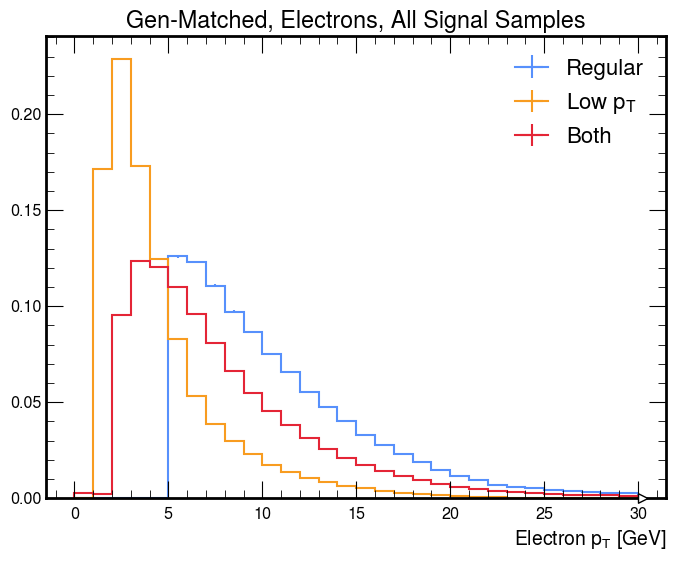

In [9]:
h = histos.load('match_ele_pt')[{"samp":sum,'cut':'no_presel','passID':1}][:,:30j]
plt.figure(figsize=(8,6))
hs = [h[{"match_type":"R"}],h[{"match_type":"L"}],h[{"match_type":"Both"}]]
hep.histplot(hs,label=['Regular',r'Low $p_T$','Both'],ax=plt.gca(),stack=False,density=True)
plt.legend(fontsize=16)
plt.xlabel("Electron $p_T$ [GeV]")
plt.title("Gen-Matched, Electrons, All Signal Samples")
plt.savefig(f"{outD}/match_ele_pt_pass_ID_withXcleanVars.pdf")

# Gen vertex

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


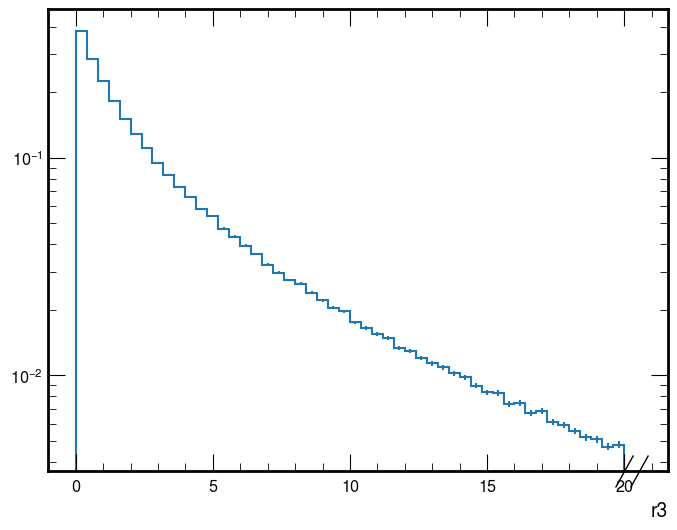

In [57]:
h = histos['gen_ele_r3_PVcorr'][{"samp":sum,'cut':'no_presel'}][:20j:2j]
plt.figure(figsize=(8,6))
hep.histplot(h,ax=plt.gca(),density=True)
#h[:,:10j].plot1d(overlay='match_type',stack=True)
plt.legend()
plt.yscale('log')
#plt.xlim([0,10])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


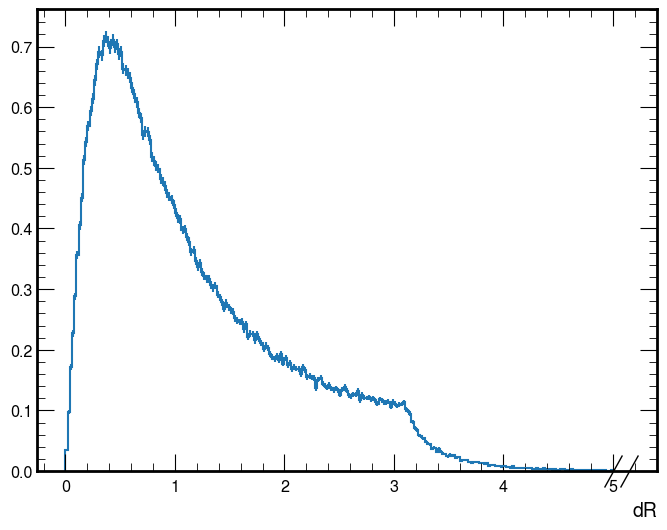

In [60]:
h = histos['gen_dR'][{"samp":sum,'cut':'no_presel'}]
plt.figure(figsize=(8,6))
hep.histplot(h,ax=plt.gca(),density=True)
#h[:,:10j].plot1d(overlay='match_type',stack=True)
plt.legend()
#plt.yscale('log')
#plt.xlim([0,10])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


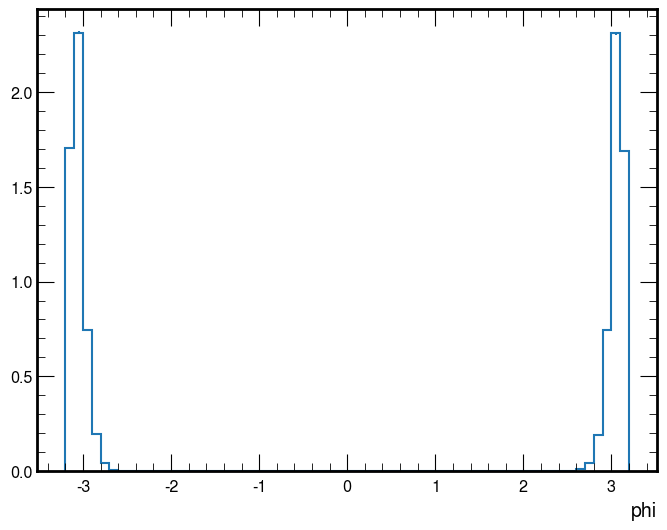

In [61]:
h = histos['gen_jetMETdPhi'][{"samp":sum,'cut':'no_presel'}]
plt.figure(figsize=(8,6))
hep.histplot(h,ax=plt.gca(),density=True)
#h[:,:10j].plot1d(overlay='match_type',stack=True)
plt.legend()
#plt.yscale('log')
#plt.xlim([0,10])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


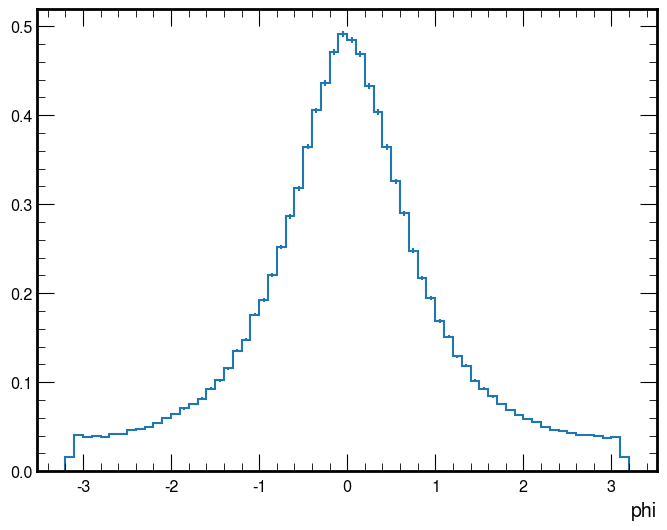

In [62]:
h = histos['gen_vtxMETdPhi'][{"samp":sum,'cut':'no_presel'}]
plt.figure(figsize=(8,6))
hep.histplot(h,ax=plt.gca(),density=True)
#h[:,:10j].plot1d(overlay='match_type',stack=True)
plt.legend()
#plt.yscale('log')
#plt.xlim([0,10])

# Match vtx

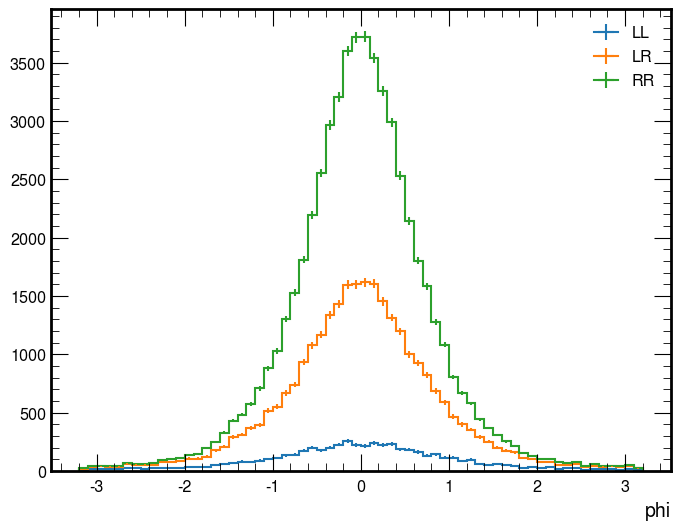

In [65]:
h = histos['match_vtx_METdPhi'][{"samp":sum,'cut':'no_presel'}]
plt.figure(figsize=(8,6))
#hep.histplot(h,ax=plt.gca(),density=True)
h.plot1d(overlay='vtype',stack=True)
plt.legend()
#plt.yscale('log')
#plt.xlim([0,10])

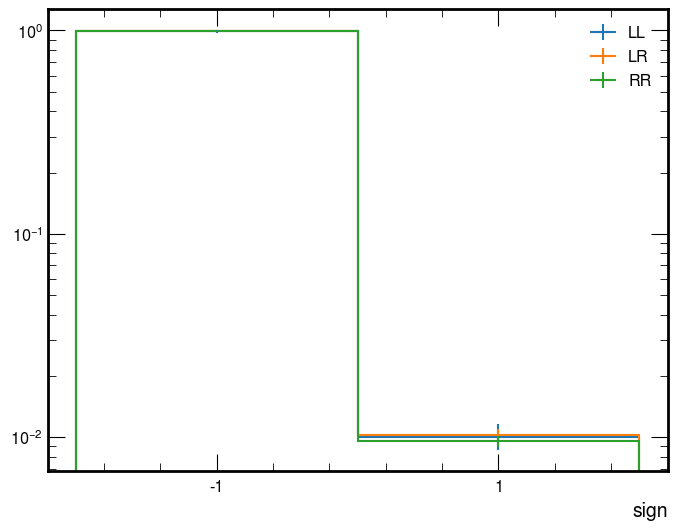

In [71]:
h = histos['match_vtx_sign'][{"samp":sum,'cut':'no_presel'}]
plt.figure(figsize=(8,6))
#hep.histplot(h,ax=plt.gca(),density=True)
h.plot1d(overlay='vtype',stack=False,density=True)
plt.legend()
plt.yscale('log')
#plt.xlim([0,10])

In [ ]:
h = histos['match_vtx_sign'][{"samp":sum,'cut':'no_presel','vtype':sum}]
plt.figure(figsize=(8,6))
#hep.histplot(h,ax=plt.gca(),density=True)
h.plot1d(overlay='vtype',stack=False,density=True)
plt.legend()
plt.yscale('log')
#plt.xlim([0,10])

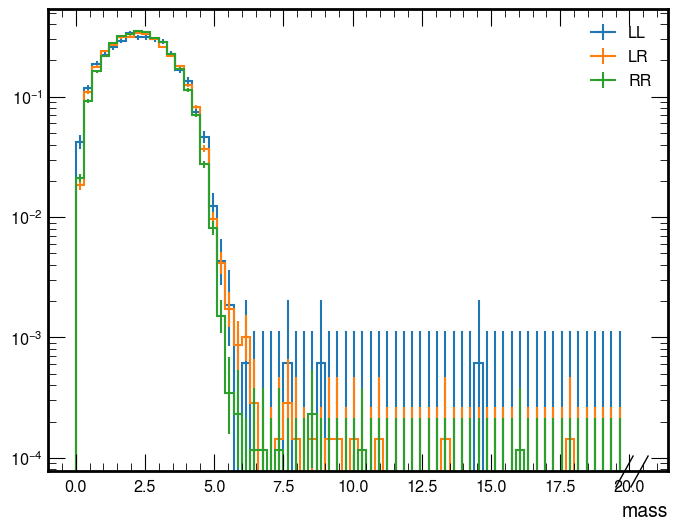

In [79]:
h = histos['match_vtx_mass'][{"samp":sum,'cut':'no_presel'}][:,:20j]
plt.figure(figsize=(8,6))
#hep.histplot(h,ax=plt.gca(),density=True)
h.plot1d(overlay='vtype',stack=False,density=True)
plt.legend()
plt.yscale('log')
#plt.xlim([0,10])

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7fab37597400>, cbar=<matplotlib.colorbar.Colorbar object at 0x7fab37597790>, text=[])

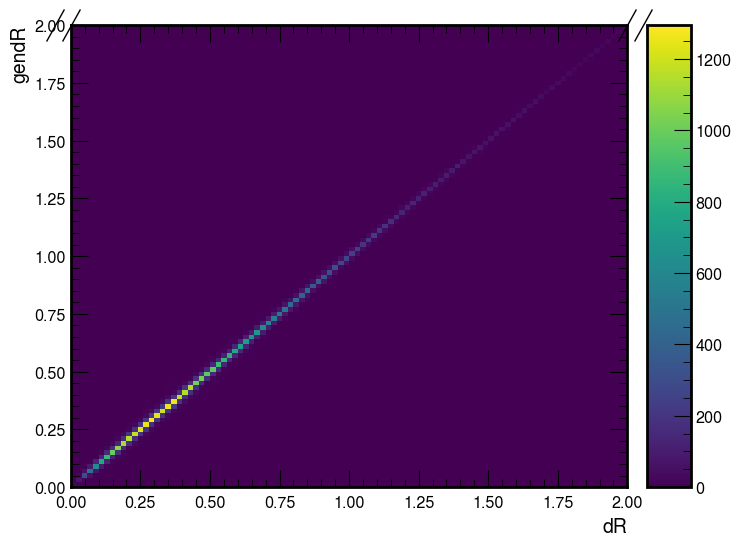

In [76]:
h1 = histos['match_vtx_reco_dR_vs_gen_dR'][{"samp":sum,'cut':'no_presel','vtype':sum}][:2j:1j,:2j:1j]
plt.figure(figsize=(8,6))
hep.hist2dplot(h1,ax=plt.gca())
#h1.plot1d()
#plt.legend()
#plt.yscale('log')
#plt.xlim([0,10])

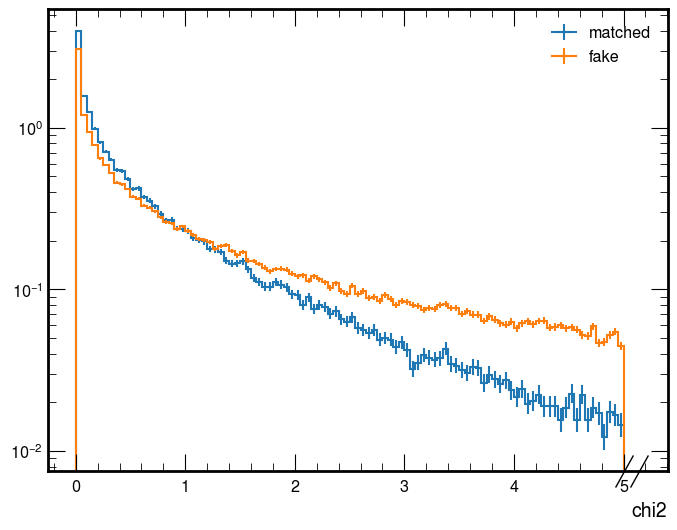

In [68]:
h1 = histos['match_vtx_chi2'][{"samp":sum,'cut':'no_presel','vtype':sum}]
h2 = histos['fake_vtx_chi2'][{"samp":sum,'cut':'no_presel','vtype':sum}]
plt.figure(figsize=(8,6))
hep.histplot([h1,h2],ax=plt.gca(),density=True,label=['matched','fake'])
#h1.plot1d()
plt.legend()
plt.yscale('log')
#plt.xlim([0,10])

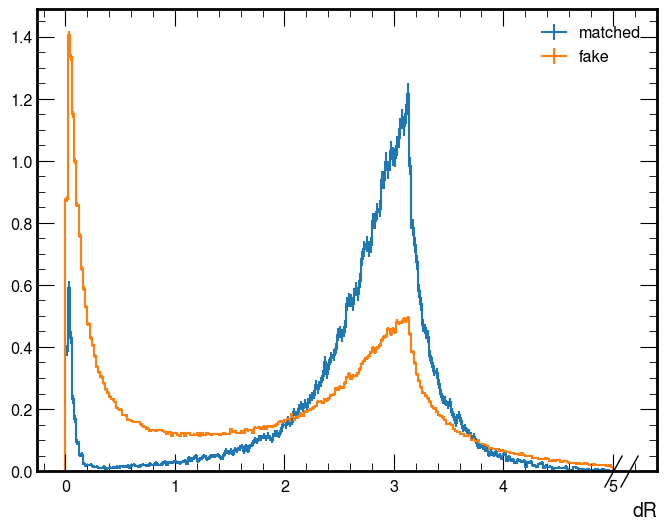

In [81]:
h1 = histos['match_vtx_mindRj'][{"samp":sum,'cut':'no_presel','vtype':sum}]
h2 = histos['fake_vtx_mindRj'][{"samp":sum,'cut':'no_presel','vtype':sum}]
plt.figure(figsize=(8,6))
hep.histplot([h1,h2],ax=plt.gca(),density=True,label=['matched','fake'])
#h1.plot1d()
plt.legend()
#plt.yscale('log')
#plt.xlim([0,10])

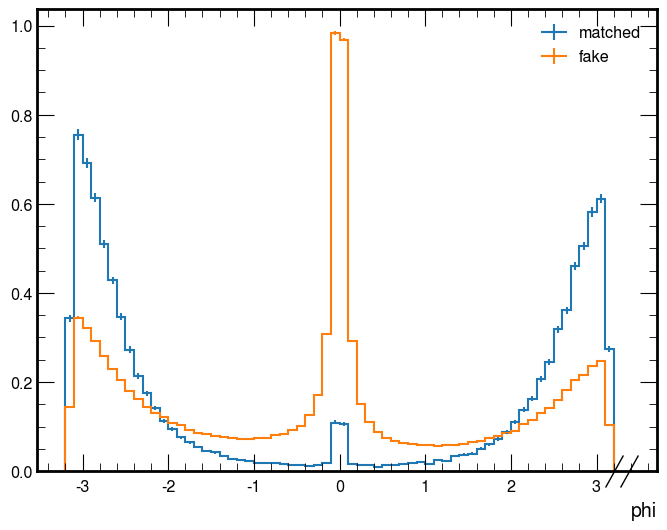

In [82]:
h1 = histos['match_vtx_mindPhiJ'][{"samp":sum,'cut':'no_presel','vtype':sum}]
h2 = histos['fake_vtx_mindPhiJ'][{"samp":sum,'cut':'no_presel','vtype':sum}]
plt.figure(figsize=(8,6))
hep.histplot([h1,h2],ax=plt.gca(),density=True,label=['matched','fake'])
#h1.plot1d()
plt.legend()
#plt.yscale('log')
#plt.xlim([0,10])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


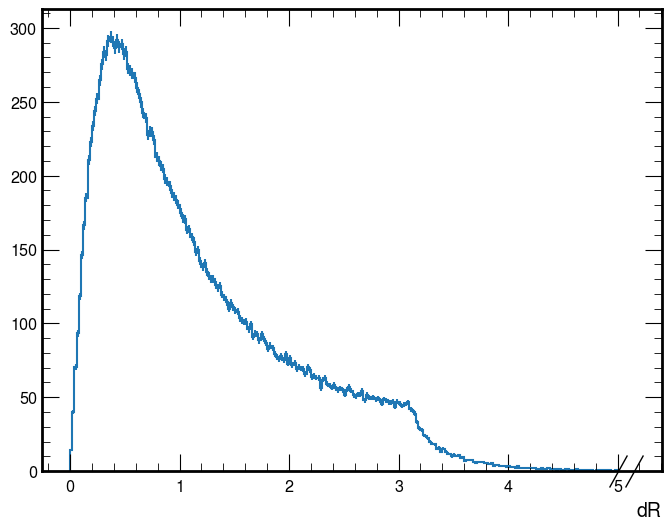

In [86]:
h1 = histos['match_vtx_dR'][{"samp":sum,'cut':'no_presel','vtype':sum}]
h2 = histos['gen_dR'][{"samp":sum,'cut':'no_presel'}]
plt.figure(figsize=(8,6))
#h1.plot_ratio(h2)
h2.plot1d()
plt.legend()
#plt.yscale('log')
#plt.xlim([0,10])